In [1]:
import tensorflow as tf
a=tf.constant([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print(a.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>


In [2]:
a[:,:2]

<tf.Tensor: id=4, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5]])>

In [3]:
a_1=a[...,1]
a_2=a[...,1,tf.newaxis]
print(a_1)
print(a_2)

tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor(
[[2]
 [5]], shape=(2, 1), dtype=int32)


In [5]:
b_0=a+100
b_1=tf.square(a)
print(b_0)
print(b_1)

tf.Tensor(
[[101 102 103]
 [104 105 106]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)


In [6]:
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
import numpy as np
c=np.array([[1,2],[3,4],[5,6]])
d_1=tf.transpose(c)
d_2=c.T

In [8]:
print(c)
print(d_1)
print(d_2)

[[1 2]
 [3 4]
 [5 6]]
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32)
[[1 3 5]
 [2 4 6]]


In [10]:
t1=1
t2=100.
tf.cast(t1,tf.float32)+t2

<tf.Tensor: id=22, shape=(), dtype=float32, numpy=101.0>

In [11]:
k=tf.Variable([[1.,2,3],[4,5,6]])
print(k)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [12]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: id=32, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [13]:
k.assign(k**2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
k[0,1].assign(100)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   9.],
       [ 16.,  25.,  36.]], dtype=float32)>

In [15]:
k[:,2].assign([0,0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   0.],
       [ 16.,  25.,   0.]], dtype=float32)>

In [16]:
k.scatter_nd_update(indices=[[0,0],[1,0]],updates=[999,999])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[999., 100.,   0.],
       [999.,  25.,   0.]], dtype=float32)>

In [2]:
import tensorflow as tf
x=tf.constant([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],
              [[13,14,15,16],[17,18,19,20],[21,22,23,24]]])
print(x.numpy())
tf.transpose(x)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


<tf.Tensor: shape=(4, 3, 2), dtype=int32, numpy=
array([[[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]],

       [[ 4, 16],
        [ 8, 20],
        [12, 24]]])>

In [3]:
tf.transpose(x, perm=(0,2,1))

<tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
array([[[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]],

       [[13, 17, 21],
        [14, 18, 22],
        [15, 19, 23],
        [16, 20, 24]]])>

In [4]:
import tensorflow as tf
a=[1.2,3.4,7.5,4.1,5.0,1.0,5.2]
ds=tf.data.Dataset.from_tensor_slices(a)
for i in ds:
    print(i.numpy())

1.2
3.4
7.5
4.1
5.0
1.0
5.2


In [5]:
ds_batch=ds.batch(3, drop_remainder=True)
for i, elem in enumerate(ds_batch,1):
    print('batch {}:' .format (i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


In [6]:
ds_batch=ds.batch(3, drop_remainder=True)
print(ds_batch.numpy())

AttributeError: 'BatchDataset' object has no attribute 'numpy'

In [7]:
t_x=tf.random.uniform([4,3], dtype=tf.float32)
t_y=tf.range(4)
ds_xy=tf.data.Dataset.from_tensor_slices((t_x,t_y))
for example in ds_xy:
    print(example[0].numpy(),example[1].numpy())

[0.02940536 0.992998   0.00561428] 0
[0.37179184 0.12528324 0.933988  ] 1
[0.7288382  0.13186073 0.38823724] 2
[0.0197314  0.33587694 0.9312159 ] 3


In [8]:
ds_transform=ds_xy.map(lambda x,y:(x*2-1.0,y))
for example in ds_transform:
    print(example[0].numpy(),example[1].numpy())

[-0.9411893   0.985996   -0.98877144] 0
[-0.25641632 -0.7494335   0.86797595] 1
[ 0.4576764  -0.73627853 -0.22352552] 2
[-0.9605372  -0.32824612  0.86243176] 3


In [9]:
ds=ds_xy.batch(3)
for example in ds:
    print(example[0].numpy())
    print(example[1].numpy())

[[0.02940536 0.992998   0.00561428]
 [0.37179184 0.12528324 0.933988  ]
 [0.7288382  0.13186073 0.38823724]]
[0 1 2]
[[0.0197314  0.33587694 0.9312159 ]]
[3]


In [10]:
ds=ds_xy.batch(3).repeat(2)
for example in ds:
    print(example[0].numpy())
    print(example[1].numpy())

[[0.02940536 0.992998   0.00561428]
 [0.37179184 0.12528324 0.933988  ]
 [0.7288382  0.13186073 0.38823724]]
[0 1 2]
[[0.0197314  0.33587694 0.9312159 ]]
[3]
[[0.02940536 0.992998   0.00561428]
 [0.37179184 0.12528324 0.933988  ]
 [0.7288382  0.13186073 0.38823724]]
[0 1 2]
[[0.0197314  0.33587694 0.9312159 ]]
[3]


In [11]:
ds=ds_xy.shuffle(4).batch(3).repeat(2)
for example in ds:
    print(example[0].numpy())
    print(example[1].numpy())

[[0.02940536 0.992998   0.00561428]
 [0.0197314  0.33587694 0.9312159 ]
 [0.37179184 0.12528324 0.933988  ]]
[0 3 1]
[[0.7288382  0.13186073 0.38823724]]
[2]
[[0.02940536 0.992998   0.00561428]
 [0.7288382  0.13186073 0.38823724]
 [0.37179184 0.12528324 0.933988  ]]
[0 2 1]
[[0.0197314  0.33587694 0.9312159 ]]
[3]


In [1]:
import tensorflow_datasets as tfds

In [2]:
print(len(tfds.list_builders()))
print(tfds.list_builders()[-5:])

246
['xsum', 'xtreme_pawsx', 'xtreme_xnli', 'yelp_polarity_reviews', 'yes_no']


In [4]:
celeb, celeb_info=tfds.load('celeb_a',with_info=True, shuffle_files=False)
print(celeb_info)

tfds.core.DatasetInfo(
    name='celeb_a',
    full_name='celeb_a/2.0.1',
    description="""
    CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including
     - 10,177 number of identities,
     - 202,599 number of face images, and
     - 5 landmark locations, 40 binary attributes annotations per image.
    
    The dataset can be employed as the training and test sets for the following computer vision tasks: face attribute recognition, face detection, and landmark (or facial part) localization.
    
    Note: CelebA dataset may contain potential bias. The fairness indicators
    [example](https://github.com/tensorflow/fairness-indicators/blob/master/fairness_indicators/documentation/examples/Fairness_Indicators_TFCO_CelebA_Case_Stud

In [3]:
mnist, mnist_info=tfds.load('mnist',with_info=True, shuffle_files=False)
print(mnist_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\user\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [5]:
print(mnist.keys())

dict_keys(['train', 'test'])


In [6]:
ds_train=mnist['train']
print(len(ds_train))
ds_train=ds_train.map(lambda item:(item['image'],item['label']))
ds_train=ds_train.shuffle(50000).batch(50000)
batch=next(iter(ds_train))
print(batch[0].shape, batch[1].shape)

60000
(50000, 28, 28, 1) (50000,)


In [7]:
import numpy as np
import pandas as pd
ds_test=mnist['test']
print(len(ds_test))
ds_test=ds_test.map(lambda item:(item['image'],item['label']))
ds_test=next(iter(ds_test))
print(ds_test[0].shape, ds_test[1].shape)

10000
(28, 28, 1) ()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [2]:
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

In [3]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


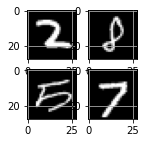

In [4]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [5]:
# one-hot coding을 위한 라이브러리 불러오기
from tensorflow.keras.utils import to_categorical, plot_model
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


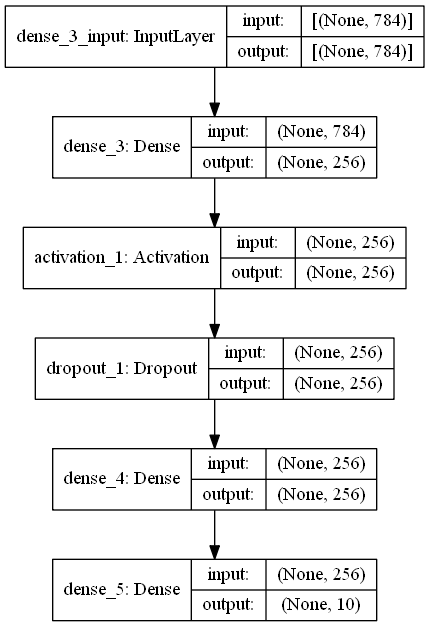

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,#to_file='C:/Users/yspark/Desktop/딥러닝교재/제 4장 TensorFlow 2.x-Keras/ch4_1.png', 
           show_shapes=True)

In [8]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val))
history_out=history.history
history_out.keys()

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0753 - val_accuracy: 0.9813
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0386 - accuracy: 0.9867 - val_loss: 0.0732 - val_accuracy: 0.9813
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0693 - val_accuracy: 0.9833
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0698 - val_accuracy: 0.9820
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0672 - val_accuracy: 0.9827
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0638 - val_accuracy: 0.9827
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0669 - val_accuracy: 0.9828
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

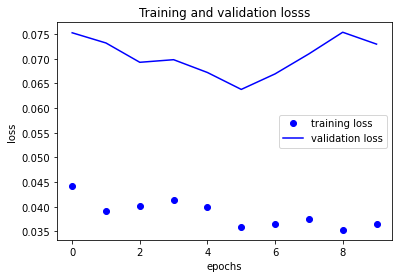

In [13]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

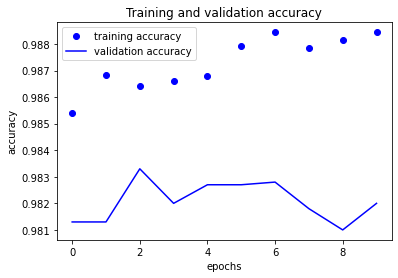

In [14]:
plt.clf()
plt.plot(accuracy,'bo',label='training accuracy')
plt.plot(accuracy_val,'b', label='validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)


Epoch 1/30
938/938 [==============================] - 4s 3ms/step - loss: 0.0505 - accuracy: 0.9862
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0420 - accuracy: 0.9870
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0400 - accuracy: 0.9875
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0374 - accuracy: 0.9878
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0322 - accuracy: 0.9894
Epoch 9/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0316 - accuracy: 0.9897
Epoch 10/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0364 - accuracy: 0.9874

In [16]:
import pandas as pd
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9857
[0.0022292437497526407, 0.9995999932289124]
[0.06841004639863968, 0.9857000112533569]


,0,1,2,3,4,5,6,7,8,9
0,2.512114e-13,1.505367e-11,3.901381e-10,6.400227e-10,3.201160e-11,1.441041e-11,1.115993e-15,1.000000e+00,1.381402e-12,2.501773e-08
1,2.701384e-20,1.336186e-12,1.000000e+00,4.983330e-11,1.056717e-25,1.490502e-22,6.312381e-17,2.324006e-15,1.005546e-17,7.058482e-25
2,1.316511e-14,1.000000e+00,2.833207e-10,8.108630e-13,2.318300e-10,6.452159e-10,2.363700e-10,2.192799e-08,7.970990e-09,1.741163e-13
3,9.999982e-01,6.465837e-17,7.313399e-11,3.011798e-11,1.620136e-11,6.655380e-08,1.623586e-06,2.194834e-11,3.581863e-11,8.832630e-09
4,1.198120e-07,1.386807e-09,2.324232e-09,9.752268e-10,9.999782e-01,1.780558e-10,1.390433e-08,5.591154e-06,8.650354e-10,1.611585e-05


In [17]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
x=Input(shape=(num_features,))
h1=Dense(256, activation='relu')(x)
h1=Dropout(0.45)(h1)
h2=Dense(256, activation='relu')(h1)
out=Dense(num_classes, activation='softmax')(h2)
model=Model(inputs=x, outputs=out)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5281 - acc: 0.8388
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.1665 - acc: 0.9491
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.1266 - acc: 0.9603
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.1025 - acc: 0.9677
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0950 - acc: 0.9699
Epoch 6/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0874 - acc: 0.9721
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0742 - acc: 0.9759
Epoch 8/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0721 - acc: 0.9769
Epoch 9/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0639 - acc: 0.9795
Epoch 10/30
938/938 [==============================] - 4s 4ms/step - loss: 0.0646 - acc: 0.9788
Epoch 11/30
938/938 [============================

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,Layer

class MyLayer(Layer):
    def __init__(self, out_dim):
        self.out=out_dim
        super(MyLayer,self).__init__()
    def build(self,input_shape):
        self.kernel=self.add_weight(shape=(input_shape[1],self.out),trainable=True)
        
    def call(self,inputs):
        return tf.matmul(inputs,self.kernel)
    
model=tf.keras.Sequential([Dense(2,input_shape=(2,)),MyLayer(4),Activation('relu')])
model.summary()
model1=tf.keras.Sequential()
model1.add(Dense(2, input_shape=(2,)))
model1.add(MyLayer(4))
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
my_layer_2 (MyLayer)         (None, 4)                 8         
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
my_layer_3 (MyLayer)         (None, 4)                 8         
____________________________________

In [ ]:
pip install --upgrade tensorflow-gpu